<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.



## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

***Ans: Whether a person would donate blood***

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [223]:
df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [225]:
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [226]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [227]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

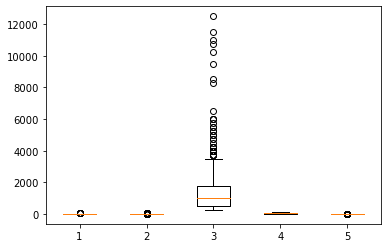

In [228]:
# Check whethere got outliers using box plot 
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(df)
plt.show()

In [229]:
# find out where the outliers are
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

threshold = 3
print(np.where(z > 3))

[[0.92789873 7.62334626 7.62334626 2.61563344 1.78948238]
 [1.17511806 1.28273826 1.28273826 0.2578809  1.78948238]
 [1.0515084  1.79684161 1.79684161 0.02947053 1.78948238]
 ...
 [1.66790417 0.43093957 0.43093957 1.13782607 0.55882081]
 [3.64565877 0.77367514 0.77367514 0.19367135 0.55882081]
 [7.72477762 0.77367514 0.77367514 1.54832812 0.55882081]]
(array([  0,   0,   4,   4,   9,   9, 115, 115, 341, 341, 495, 496, 497,
       498, 499, 500, 500, 502, 502, 503, 503, 504, 504, 505, 505, 517,
       517, 528, 528, 746, 747], dtype=int64), array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 0], dtype=int64))


In [230]:
# first array --> row
# second array --> columns
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   4,   4,   9,   9, 115, 115, 341, 341, 495, 496, 497,
       498, 499, 500, 500, 502, 502, 503, 503, 504, 504, 505, 505, 517,
       517, 528, 528, 746, 747], dtype=int64), array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 0], dtype=int64))


In [231]:
print(z[0][1])

7.62334626135984


In [232]:
# Remove outliers

df_o = df[(z < 3).all(axis=1)]
df_o

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
5,4,4,1000,4,0
6,2,7,1750,14,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [233]:
#with outliers
df.shape

(748, 5)

In [234]:
#after outliers removed
df_o.shape

(729, 5)

In [235]:
df_o

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
5,4,4,1000,4,0
6,2,7,1750,14,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [236]:
df_o = df.rename(columns={"Recency (months)": "Recency", 
                   "Frequency (times)": "Frequency", 
                   "Monetary (c.c. blood)" : "Monetary",
                  "Time (months)": "months",
                  "whether he/she donated blood in March 2007": "donate_or_not"})
df_o

,Recency,Frequency,Monetary,months,donate_or_not
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [237]:
df_o.head()

,Recency,Frequency,Monetary,months,donate_or_not
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [238]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   months         748 non-null    int64
 4   donate_or_not  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


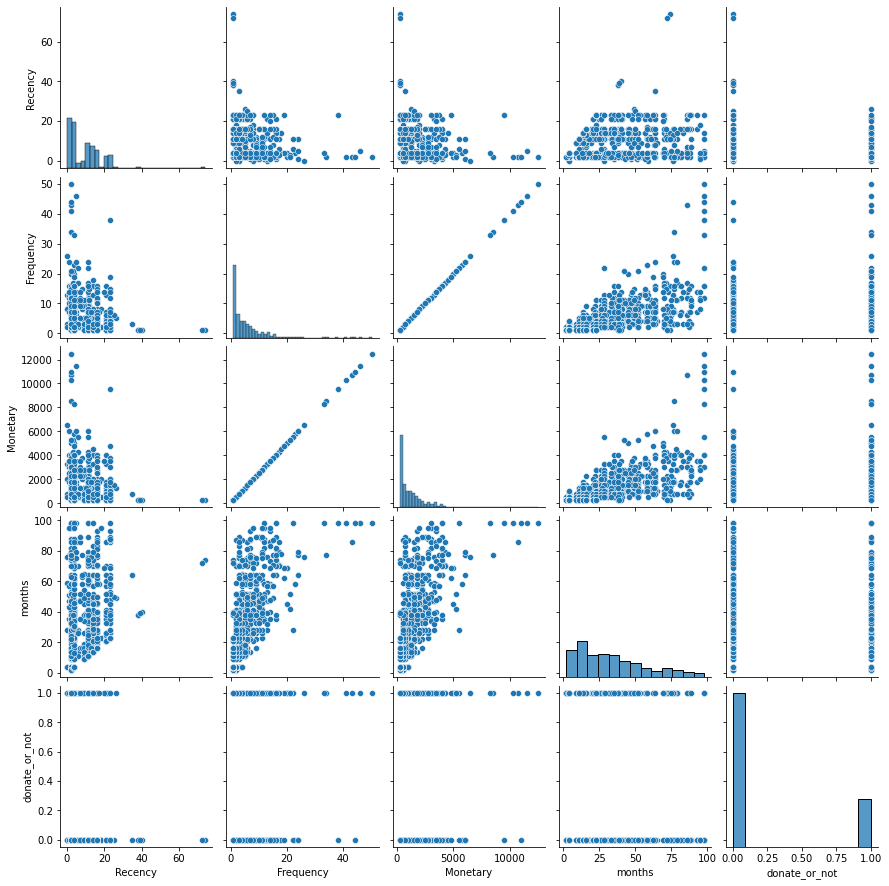

In [239]:
sns.pairplot(data=df_o)


<AxesSubplot:>

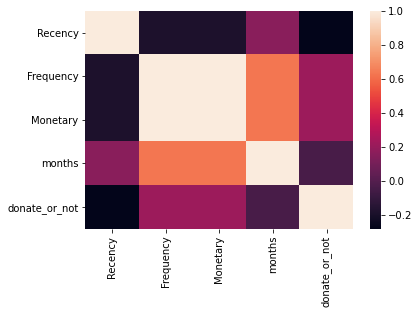

In [240]:
sns.heatmap(df_o.corr())

(1) Months and whether they donate or not are not related

(2) Monetary and Frequency are highly related

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? 
- Is there an output variable (label)?
- If there is an output variable:
    - What is it? **donate_or_not**
    - What is its type? **Int64**
- What type of Modelling is it?
    - [ ✓] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [✓] Classification (multi-class)
    - [ ] Clustering

In [241]:
# Is there an output variable (label)?
target = df_o['donate_or_not']
y = target
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: donate_or_not, Length: 748, dtype: int64

In [216]:
# What are the input variables (features)?
columns = df_o.columns
X = df_o[[col for col in columns if col != "donate_or_not"]]
X

,Recency,Frequency,Monetary,months
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [242]:
# Define the split in Training/Test or Training/Validation/Test and their proportions

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)

print("Testing split input- ", X_test.shape)

Training split input-  (598, 4)
Testing split input-  (150, 4)


In [243]:
# Number of known cases or observations
# Examine the class distribution of the testing set
y_train.value_counts()

0    457
1    141
Name: donate_or_not, dtype: int64

In [244]:
# Calculate the percentage of ones since the target variable only has 0 and 1 outputs
y_train.mean()

0.23578595317725753

In [245]:
# Calculate the percentage of zereos
1- y_train.mean()

0.7642140468227425

In [246]:
# Calculate null accuracy. 
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class
max(y_train.mean(), 1 - y_train.mean())

0.7642140468227425

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [248]:
# Define the mode

dtree=DecisionTreeClassifier(max_depth=3)

# Define the hyper-parameters.

# Step 9: Fit the Model

In [249]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Source: https://www.ritchieng.com/machine-learning-evaluate-classification-model/

**(1) Obtain number of class distribution of testing set** 

In [250]:
# Examine the class distribution of the training set
y_train.value_counts()

0    457
1    141
Name: donate_or_not, dtype: int64

**(2) Predict using training set data**

In [251]:
# Use the training data to make predictions

y_pred_training = dtree.predict(X_train)
y_pred_training

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

**(3) Check training data against predictions**

In [252]:
# Check the Training Results Against the Training Predictions

print('True:', y_train.values[0:25])
print('False:', y_pred_training[0:25])

True: [1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0]
False: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [253]:
print("Classification report - \n", classification_report(y_train,y_pred_training))

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       457
           1       0.60      0.43      0.50       141

    accuracy                           0.80       598
   macro avg       0.72      0.67      0.69       598
weighted avg       0.78      0.80      0.78       598



**(4) Evaluate how much of the data the model is able to predict**

In [254]:
# Finding out the number of data predicted accurately

print(metrics.confusion_matrix(y_train, y_pred_training))

[[417  40]
 [ 81  60]]


Interpretation of results:

- True Positivees(TP): we correctly predicted that 105 of the patients will donate blood

- True Negatives(TN): we correctly predicted that 456 of the patients will not donate blood

- False Positive(FP): we incorrectly predicted that 1 person will not donate blood

- False Negativees(FN): we incorrectly predicted that 36 they will not donate blood


Text(0.5, 48.29999999999998, 'Predicted label')

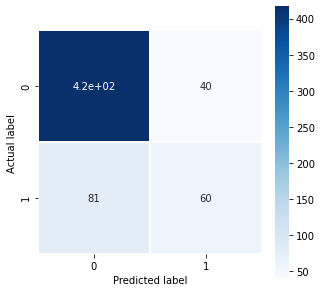

In [255]:
# Visualization of number of data predicted accurately

cm = confusion_matrix(y_train, y_pred_training)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

# all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_train,y_train))

#plt.title(all_sample_title, size = 15)

**(5) Further evaluation of the accuracy of the model**

In [256]:

confusion = metrics.confusion_matrix(y_train, y_pred_training)

print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[417  40]
 [ 81  60]]


**5.1 Accuracy Score**

In [257]:
# Accuracy Score calculates how often the model is correct

dtree.score(X_train,y_train)

0.7976588628762542

**5.2 Classification Error**: How often the classifier is incorrect

In [258]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_train, y_pred_training))

0.20234113712374582
0.2023411371237458


**5.3 Sensitivity**: How often is the prediction correct?

In [259]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_train, y_pred_training))

0.425531914893617
0.425531914893617


**(6) Decision Tree Visualization**

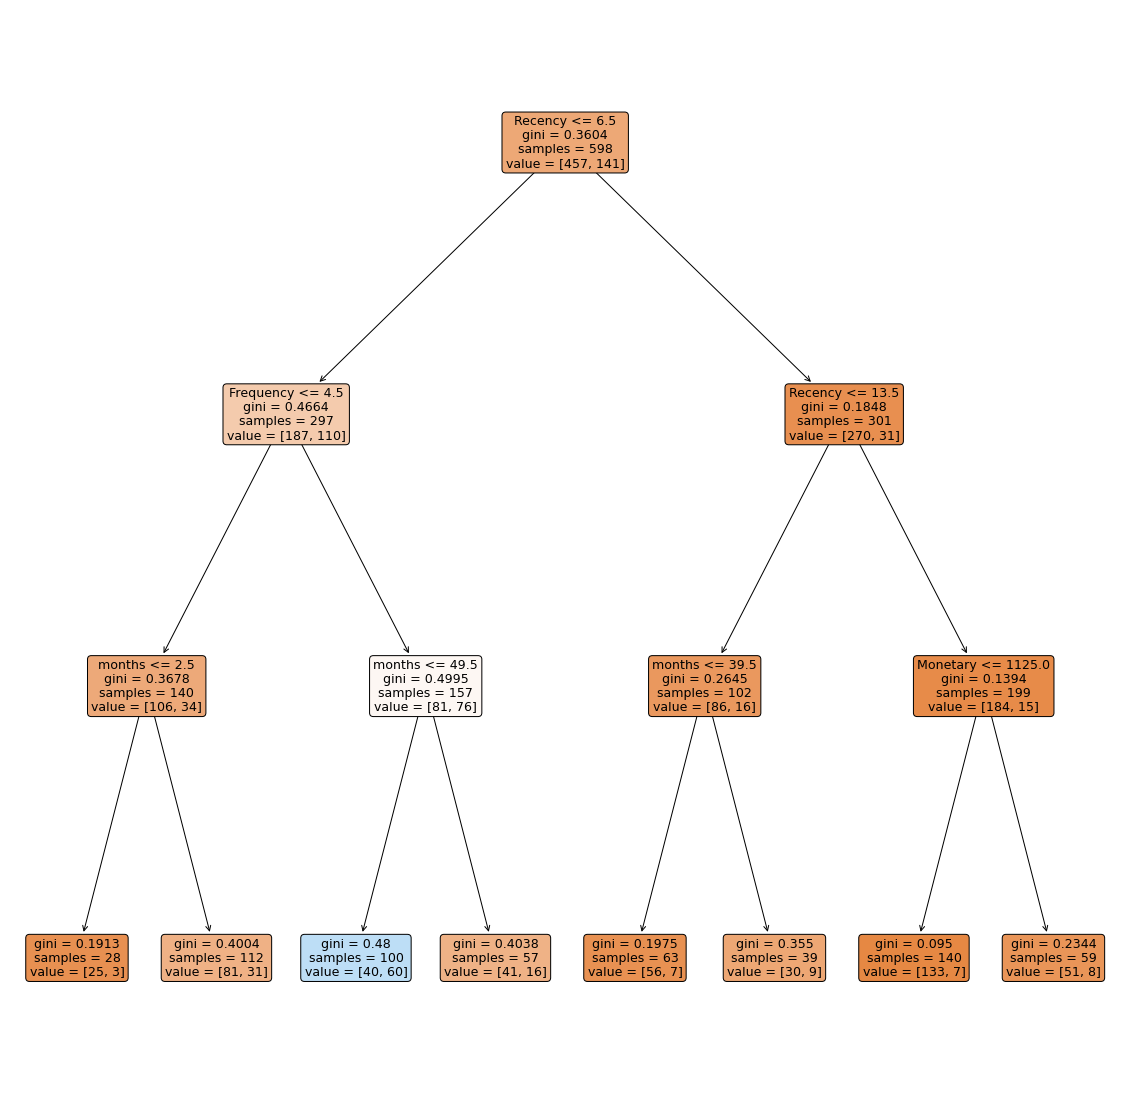

In [260]:
# Visualising the graph without the use of graph

plt.figure(figsize = (20,20))

dec_tree = plot_tree(decision_tree=dtree, feature_names = df_o.columns, 
                     filled = True , precision = 4, rounded = True)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

**(1) Check the number of values distributed in the test set**

In [261]:
# Examine the class distribution of the test set
y_test.value_counts()

0    113
1     37
Name: donate_or_not, dtype: int64

**(2) Predict using test set data**

In [262]:
# Use the test data to make predictions

y_pred_test = dtree.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

**(3) Check training data against predictions**

In [263]:
# Check the Training Results Against the Training Predictions

print('True:', y_test.values[0:25])
print('False:', y_pred_test[0:25])

True: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1]
False: [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


In [264]:
print("Classification report - \n", classification_report(y_test,y_pred_test))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       113
           1       0.63      0.32      0.43        37

    accuracy                           0.79       150
   macro avg       0.72      0.63      0.65       150
weighted avg       0.77      0.79      0.76       150



**(4) Evaluate how much of the data the model is able to predict**

In [265]:
# Finding out the number of data predicted accurately

print(metrics.confusion_matrix(y_test, y_pred_test))

[[106   7]
 [ 25  12]]


Interpretation of results:

True Positivees(TP): we correctly predicted that 8 of the patients will donate blood

True Negatives(TN): we correctly predicted that 90 of the patients will not donate blood

False Positive(FP): we incorrectly predicted that 23 person will not donate blood

False Negativees(FN): we incorrectly predicted that 29 they will not donate blood

In [266]:
# Use the test data to make predictions
y_pred_test = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred_test))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       113
           1       0.63      0.32      0.43        37

    accuracy                           0.79       150
   macro avg       0.72      0.63      0.65       150
weighted avg       0.77      0.79      0.76       150



In [267]:
# Check the Test Results with the Test Predictions
# Accuracy Score
dtree.score(X_test,y_test)

0.7866666666666666

Text(0.5, 48.29999999999998, 'Predicted label')

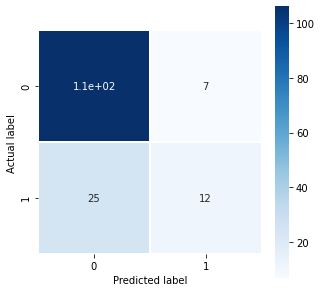

In [268]:
# Visualization of number of data predicted accurately

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

# all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_train,y_train))

#plt.title(all_sample_title, size = 15)

**(5) Further evaluation of the accuracy of the model**

In [269]:
confusion = metrics.confusion_matrix(y_train, y_pred_training)

print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[417  40]
 [ 81  60]]


**5.1 Accuracy Score**

In [270]:
# Accuracy Score calculates how often the model is correct

dtree.score(X_train,y_train)

0.7976588628762542

**5.2 Classification Error: How often the classifier is incorrect**

In [271]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_train, y_pred_training))

0.20234113712374582
0.2023411371237458


**5.3 Sensitivity: How often is the prediction correct?**

In [272]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_train, y_pred_training))

0.425531914893617
0.425531914893617


**(6) Decision Tree Visualization**

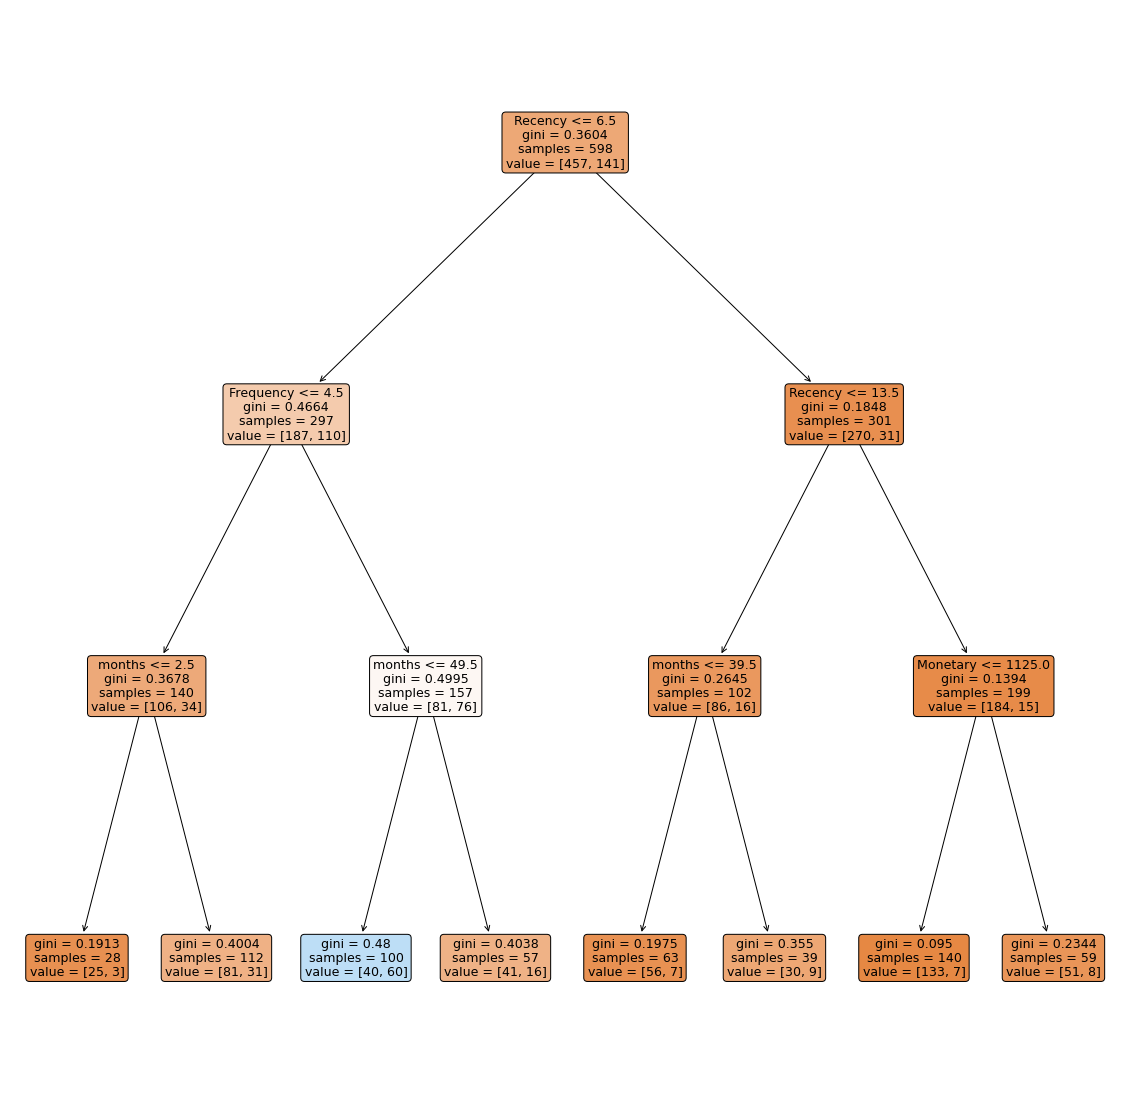

In [273]:
# Visualising the graph without the use of graph

plt.figure(figsize = (20,20))

dec_tree = plot_tree(decision_tree=dtree, feature_names = df_o.columns, 
                     filled = True , precision = 4, rounded = True)

**(7) Check overfitting using cross validation**

In [366]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_o[[col for col in columns if col != "donate_or_not"]]
y = df_o['donate_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


import pandas as pd

dtree = DecisionTreeClassifier()

k_fold = KFold(5, shuffle=True) #so there are 4 folds for training set and 1 fold for test set
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    
    # Get training and test sets for X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    
    
    # Fit model with training set

    dtree.fit(X_train, y_train)
    
    # Make predictions with training and test set
    
# Predictions with test set

    y_pred_test_data = dtree.predict(X_test)

    # Score R2 and RMSE on training and test sets and store in list

# R2     
    r_sq_test = dtree.score(X_test,y_test)  
    test_scores.append(r_sq_test)
    r_sq_train =dtree.score(X_train,y_train)
    train_scores.append(r_sq_train)

# MSE

    predicted_y_test = dtree.predict(X_test)
    MSE_test = mean_squared_error(y_test,predicted_y_test)
    test_rmse.append(MSE_test)
    
    

    predicted_y_train = dtree.predict(X_train)
    X_new_train = np.reshape(np.array(X_train), -1)
    X_this_one = X_new_train[0:598]
    MSE_train = mean_squared_error(X_this_one,predicted_y_train)
    train_rmse.append(MSE_train)

# Create a metrics_df dataframe to display r2 and rmse scores
 
    combined = {'r-square': [train_scores, test_scores], 'mse': [train_rmse, test_rmse]}

metrics_df= pd.DataFrame(combined, index = ['training data','test data'])  
metrics_df

,r-square,mse
training data,"[0.9347826086956522, 0.9364548494983278, 0.939...","[1216830.066889632, 1093211.3193979934, 972386..."
test data,"[0.7, 0.7666666666666667, 0.7066666666666667, ...","[0.3, 0.23333333333333334, 0.29333333333333333..."


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



